![](https://j.gifs.com/76kDrQ.gif)

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D://IAF/predictive_maintenance.csv")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
df['Failure Type'].value_counts()

In [4]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [5]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,UDI,Product ID,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
2500,2501,L49680,L,26.95,36.75,1617,32.3,223,0,No Failure,9.8
4220,4221,M19080,M,29.75,38.45,1260,65.9,29,0,No Failure,8.7
7167,7168,L54347,L,28.15,38.15,1362,60.3,206,1,Overstrain Failure,10.0
171,172,L47351,L,26.05,35.95,1462,50.8,27,0,No Failure,9.9
3132,3133,L50312,L,27.95,37.35,1557,40.6,59,0,No Failure,9.4


In [ ]:
display(df.shape)
display(df.size)

In [ ]:
df.info() 

In [6]:
df.describe().style.background_gradient(cmap="magma")

,UDI,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2886.895680,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,1.000000,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,2500.750000,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,5000.500000,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,7500.250000,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,10000.000000,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


In [ ]:
sns.distplot(df["Air temperature [K]"], kde=True, bins = 100);

In [ ]:
df.columns

In [ ]:
sns.distplot(df["Process temperature [K]"], kde=True, bins = 100)

In [ ]:
sns.distplot(df["Temperature difference [°C]"], kde=True, bins = 100,color = "blue")

In [7]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
********************************
0    9661
1     339
Name: Target, dtype: int64
********************************
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
********************************


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

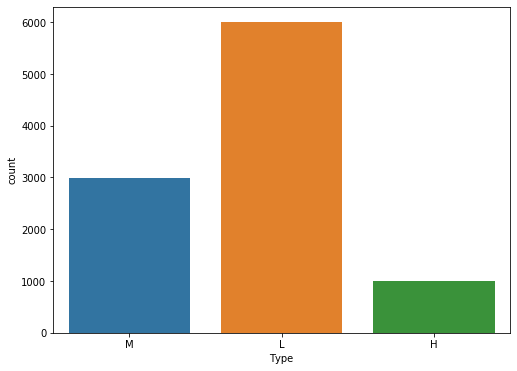

In [8]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

In [ ]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

In [ ]:
df.head(2)

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(df["Torque [Nm]"],df["Rotational speed [rpm]"], hue=df["Failure Type"])

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(df["Torque [Nm]"],df["Rotational speed [rpm]"], hue=df["Target"])

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

In [ ]:
df.head(2)

In [ ]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

In [ ]:
# sns.pairplot(df,hue = "Failure Type");

In [ ]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

In [ ]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

In [ ]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

In [ ]:
#!pip install --user category_encoders

In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

In [ ]:
df['Failure Type'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [ ]:
df.head()

In [ ]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [ ]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})

In [ ]:
pd.set_option('precision',2)
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

In [ ]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })